In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Baku') 
race = ff1.get_session(2023, 'Baku', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()

In [13]:
driver_1, driver_2, driver_3, driver_4, driver_5 = 'PER', 'VER', 'LEC', 'ALO', 'SAI'
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)
laps_driver_3 = race.laps.pick_driver(driver_3)
laps_driver_4 = race.laps.pick_driver(driver_4)
laps_driver_5 = race.laps.pick_driver(driver_5)

telemetry_driver_1 = laps_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = laps_driver_2.get_telemetry().add_distance()
telemetry_driver_3 = laps_driver_3.get_telemetry().add_distance()
telemetry_driver_4 = laps_driver_4.get_telemetry().add_distance()
telemetry_driver_5 = laps_driver_5.get_telemetry().add_distance()

team_driver_1 = pd.unique(laps_driver_1['Team'])[0]
team_driver_2 = pd.unique(laps_driver_2['Team'])[0]
team_driver_3 = pd.unique(laps_driver_3['Team'])[0]
team_driver_4 = pd.unique(laps_driver_4['Team'])[0]
team_driver_5 = pd.unique(laps_driver_5['Team'])[0]

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(laps_driver_1, laps_driver_2)
delta_time13, ref_tel13, compare_tel13 = utils.delta_time(laps_driver_1, laps_driver_3)
delta_time14, ref_tel14, compare_tel14 = utils.delta_time(laps_driver_1, laps_driver_4)
delta_time15, ref_tel15, compare_tel15 = utils.delta_time(laps_driver_1, laps_driver_5)

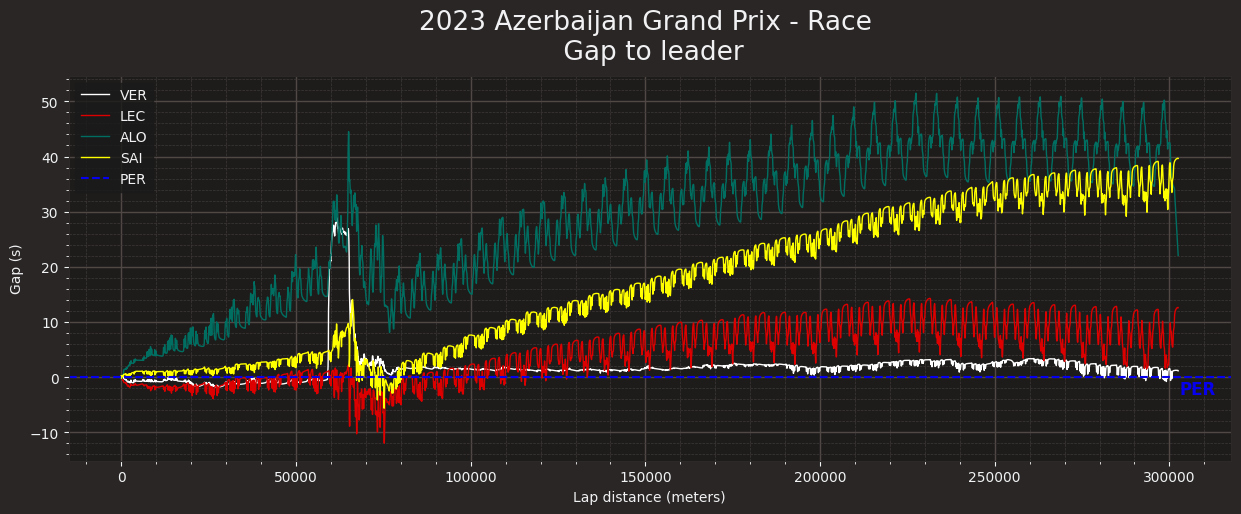

In [21]:

ff1.plotting.setup_mpl()

plot_title = f"{race.event.year} {race.event.EventName} - {race.name} \n Gap to leader"
plot_ratios = [1]

# Create subplots with different sizes
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(15)
# Set the plot title
ax.title.set_text(plot_title)

# Delta line
ax.plot(ref_tel12['Distance'], delta_time12, color="white", label=driver_2, linewidth=1) #verstappen
ax.plot(ref_tel13['Distance'], delta_time13, color=ff1.plotting.team_color(team_driver_3), label=driver_3, linewidth=1) #leclerc
ax.plot(ref_tel14['Distance'], delta_time14, color=ff1.plotting.team_color(team_driver_4), label=driver_4, linewidth=1) #alonso
ax.plot(ref_tel15['Distance'], delta_time15, color="yellow", label=driver_5, linewidth=1) #sainz
ax.axhline(0, color=ff1.plotting.team_color(team_driver_1), linestyle='dashed', label = driver_1)

ax.set(ylabel=f"Gap (s)")
ax.set(xlabel='Lap distance (meters)')

plt.text(x=303000, y=-3, s=driver_1, color=ff1.plotting.team_color(team_driver_1), fontsize=12, weight='bold')

#plt.gca().invert_yaxis()
ax.legend()